In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.linear_model import LinearRegression, Lasso, Ridge

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from scipy.stats import randint, uniform
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

"""
Detalhes no fim dos códigos
Modelos escolhidos para teste:
  Lineares:
    1. Linear Regression
    2. Lasso/Ridge
  Não Lineares:
    1. Random Forest
    2. XGBoost
    3. MLPRegressor (Rede Neural Feedforward)
    4. SVR (com kernel RBF)
"""

df = pd.read_csv("/content/drive/MyDrive/Projeto Ciência de Dados/dados-manaus-preprocessado.csv")

X = df.drop(columns=['vazao', 'municipio', 'uf'])
y = df['vazao']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Padronização para SVR e MLP
scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

# **Modelos Lineares**

* **Linear Regression**

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print("📏 Linear Regression")
print(f"RMSE: {lr_rmse:.2f}")
print(f"MAE: {lr_mae:.2f}")
print(f"R²: {lr_r2:.4f}")

plt.plot(y_test.values, label='Real')
plt.plot(lr_pred, label='Previsto (LR)')
plt.legend()
plt.title("Previsão de vazão")
plt.show()

* **Lasso**

In [ ]:
lasso_model = Lasso(alpha=1.0, random_state=42)
lasso_model.fit(X_train_scaled, y_train)
lasso_pred = lasso_model.predict(X_test_scaled)

lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print("🧲 Lasso Regression")
print(f"RMSE: {lasso_rmse:.2f}")
print(f"MAE: {lasso_mae:.2f}")
print(f"R²: {lasso_r2:.4f}")

plt.plot(y_test.values, label='Real')
plt.plot(lasso_pred, label='Previsto (Lasso)')
plt.legend()
plt.title("Previsão de vazão")
plt.show()

* **Ridge**

In [ ]:
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_scaled, y_train)
ridge_pred = ridge_model.predict(X_test_scaled)

ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print("🧰 Ridge Regression")
print(f"RMSE: {ridge_rmse:.2f}")
print(f"MAE: {ridge_mae:.2f}")
print(f"R²: {ridge_r2:.4f}")

plt.plot(y_test.values, label='Real')
plt.plot(ridge_pred, label='Previsto (Ridge)')
plt.legend()
plt.title("Previsão de vazão")
plt.show()

# **Modelos Não Lineares**

* **Random Forest**

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("🌲 Random Forest")
print(f"RMSE: {rf_rmse:.2f}")
print(f"MAE: {rf_mae:.2f}")
print(f"R²: {rf_r2:.4f}")

plt.plot(y_test.values, label='Real')
plt.plot(rf_pred, label='Previsto (RF)')
plt.legend()
plt.title(f"Random Forest\nRMSE={rf_rmse:.2f} | MAE={rf_mae:.2f} | R²={rf_r2:.3f}")
plt.show()

* **XGBoost**

🔷 XGBoost
RMSE: 22247.43
MAE: 17669.68
R²: 0.7203


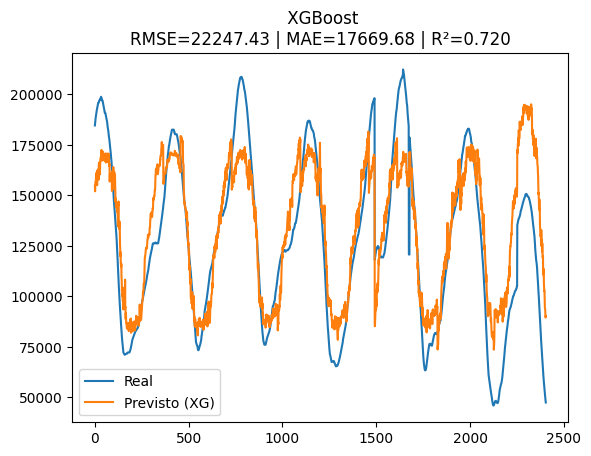

In [ ]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

print("🔷 XGBoost")
print(f"RMSE: {xgb_rmse:.2f}")
print(f"MAE: {xgb_mae:.2f}")
print(f"R²: {xgb_r2:.4f}")

plt.plot(y_test.values, label='Real')
plt.plot(xgb_pred, label='Previsto (XG)')
plt.legend()
plt.title(f" XGBoost\nRMSE={xgb_rmse:.2f} | MAE={xgb_mae:.2f} | R²={xgb_r2:.3f}")
plt.show()

* **MLP**

In [ ]:
mlp_model = MLPRegressor(random_state=42, max_iter=1000)
mlp_model.fit(X_train_scaled, y_train)
mlp_pred = mlp_model.predict(X_test_scaled)

mlp_rmse = np.sqrt(mean_squared_error(y_test, mlp_pred))
mlp_mae = mean_absolute_error(y_test, mlp_pred)
mlp_r2 = r2_score(y_test, mlp_pred)

print("🔁 MLP Regressor")
print(f"RMSE: {mlp_rmse:.2f}")
print(f"MAE: {mlp_mae:.2f}")
print(f"R²: {mlp_r2:.4f}")

plt.plot(y_test.values, label='Real')
plt.plot(mlp_pred, label='Previsto (MLP)')
plt.legend()
plt.title(f"MLP Regressor\nRMSE={mlp_rmse:.2f} | MAE={mlp_mae:.2f} | R²={mlp_r2:.3f}")
plt.show()

* **SVR**

In [ ]:
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
svr_pred = svr_model.predict(X_test_scaled)

svr_rmse = np.sqrt(mean_squared_error(y_test, svr_pred))
svr_mae = mean_absolute_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)

print("📈 SVR (RBF)")
print(f"RMSE: {svr_rmse:.2f}")
print(f"MAE: {svr_mae:.2f}")
print(f"R²: {svr_r2:.4f}")

plt.plot(y_test.values, label='Real')
plt.plot(svr_pred, label='Previsto (SVR)')
plt.legend()
plt.title(f"SVR (kernel RBF)\nRMSE={svr_rmse:.2f} | MAE={svr_mae:.2f} | R²={svr_r2:.3f}")
plt.show()

# **Comparação**

* **Modelos Lineares**

In [ ]:
linear_results = pd.DataFrame({
    "Modelo": ["Linear", "Lasso", "Ridge"],
    "RMSE": [lr_rmse, lasso_rmse, ridge_rmse],
    "MAE": [lr_mae, lasso_mae, ridge_mae],
    "R²": [lr_r2, lasso_r2, ridge_r2]
}).sort_values(by="RMSE")

plt.figure(figsize=(10, 6))
sns.barplot(data=linear_results, x="Modelo", y="RMSE")
plt.title("Desempenho dos Modelos Lineares (RMSE)")
plt.ylabel("RMSE  (menor = melhor)")
plt.xlabel("Modelo")
plt.tight_layout()
plt.show()

linear_results.reset_index(drop=True)

* **Modelos Não Lineares**

In [ ]:
results_df = pd.DataFrame({
    "Modelo": ["XGBoost", "Random Forest", "MLP", "SVR (RBF)"],
    "RMSE": [xgb_rmse, rf_rmse, mlp_rmse, svr_rmse],
    "MAE": [xgb_mae, rf_mae, mlp_mae, svr_mae],
    "R²": [xgb_r2, rf_r2, mlp_r2, svr_r2]
}).sort_values(by="RMSE")

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Modelo", y="RMSE")
plt.title("Comparação dos Modelos Não Lineares (RMSE)")
plt.ylabel("RMSE  (menor = melhor)")
plt.xlabel("Modelo")
plt.tight_layout()
plt.show()

results_df.reset_index(drop=True)

# **Buscando a melhor configuração para Random Forest e XGBoost**

* **Random Forest**

In [ ]:
rf = RandomForestRegressor(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20],
    'min_samples_split': [3, 5],
    'min_samples_leaf': [1,3],
    'max_features': ['sqrt', 'log2']
}

grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_

print("🌳 Random Forest - Melhores hiperparâmetros:")
print(grid_search_rf.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
🌳 Random Forest - Melhores hiperparâmetros:
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}


* **XGBoost**

In [ ]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.15],
    'subsample': [0.7, 0.85, 1.0],
    'colsample_bytree': [0.7, 0.85, 1.0],
    'gamma': [0, 0.15, 0.3]
}

grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search_xgb.fit(X_train, y_train)

best_xgb = grid_search_xgb.best_estimator_

print("⚡ XGBoost - Melhores hiperparâmetros:")
print(grid_search_xgb.best_params_)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
⚡ XGBoost - Melhores hiperparâmetros:
{'colsample_bytree': 0.85, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.85}


* **Nova Comparação**

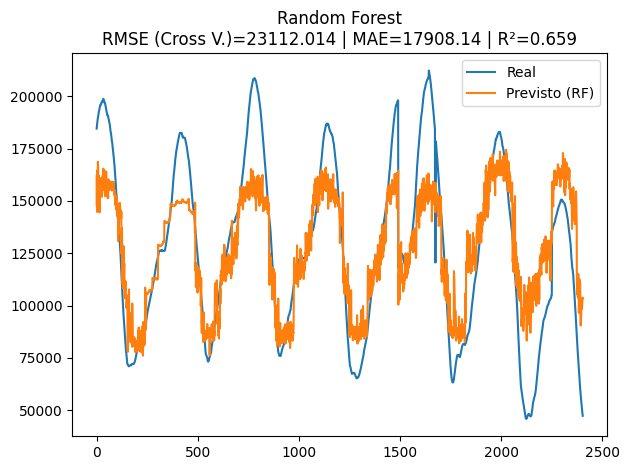

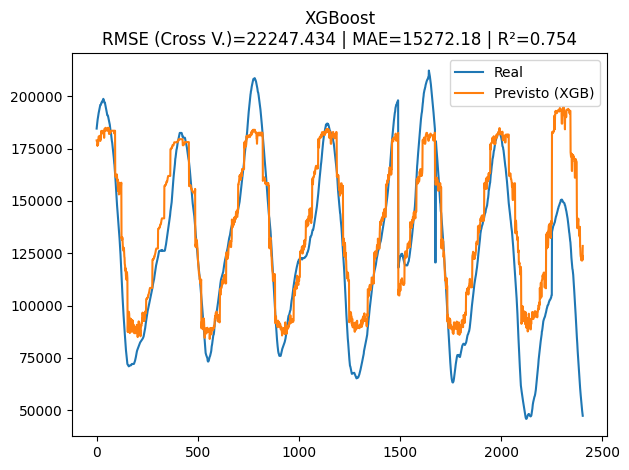

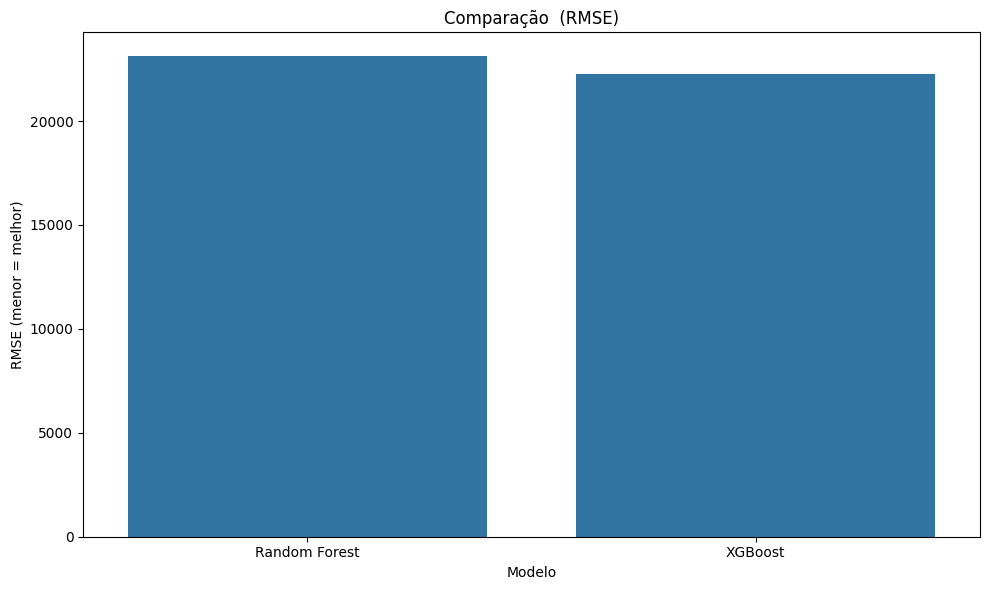

In [ ]:
rf_pred = best_rf.predict(X_test)
xgb_pred = best_xgb.predict(X_test)

cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='neg_root_mean_squared_error')
rmse_scores = -cv_scores # Convertendo para valores positivos (RMSE)
rf_rmse = np.mean(rmse_scores)

cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='neg_mean_absolute_error')
rmse_scores = -cv_scores # Convertendo para valores positivos (MAE)
rf_mae = np.mean(rmse_scores)

cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='r2')
rf_r2 = np.mean(cv_scores) # (R²)

cv_scores = cross_val_score(best_xgb, X, y, cv=5, scoring='neg_root_mean_squared_error')
xgb_scores = -cv_scores # Convertendo para valores positivos (RMSE)
xgb_rmnse = np.mean(xgb_scores)

cv_scores = cross_val_score(best_xgb, X, y, cv=5, scoring='neg_mean_absolute_error')
rmse_scores = -cv_scores # Convertendo para valores positivos (MAE)
xgb_mae = np.mean(rmse_scores)

cv_scores = cross_val_score(best_xgb, X, y, cv=5, scoring='r2')
xgb_r2 = np.mean(cv_scores) # (R²)

# Random Forest
plt.plot(y_test.values, label='Real')
plt.plot(rf_pred, label='Previsto (RF)')
plt.title(f"Random Forest\nRMSE (Cross V.)={rf_rmse:.3f} | MAE={rf_mae:.2f} | R²={rf_r2:.3f}")
plt.legend()
plt.tight_layout()
plt.show()

# XGBoost
plt.plot(y_test.values, label='Real')
plt.plot(xgb_pred, label='Previsto (XGB)')
plt.title(f"XGBoost\nRMSE (Cross V.)={xgb_rmse:.3f} | MAE={xgb_mae:.2f} | R²={xgb_r2:.3f}")
plt.legend()
plt.tight_layout()
plt.show()

# DataFrame com os resultados
results_df = pd.DataFrame({
    'Modelo': ['Random Forest', 'XGBoost'],
    'RMSE': [rf_rmse, xgb_rmse],
    'MAE': [rf_mae, xgb_mae],
    'R²': [rf_r2, xgb_r2]
})

print()
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Modelo", y="RMSE")
plt.title("Comparação  (RMSE)")
plt.ylabel("RMSE (menor = melhor)")
plt.xlabel("Modelo")
plt.tight_layout()
plt.show()

In [ ]:
"""
Linear Regression
  Tenta encontrar uma reta (ou plano, no caso de múltiplas variáveis) que melhor se ajusta aos dados.
  Assumimos uma relação linear entre os preditores e a variável alvo.

Lasso/Ridge Regression
  São regressões lineares com regularização:
  Lasso (L1): força alguns coeficientes a zero (faz seleção de variáveis).
  Ridge (L2): encolhe os coeficientes, mas não zera.
  Hiperparâmetros principais:
    alpha:	Força da regularização. Maior alpha = mais penalização.
    max_iter:	Número máximo de iterações (caso não convirja).

Random Forest Regressor
  É um conjunto de árvores de decisão.
  Cada árvore tenta prever a saída (vazão), e o resultado final é a média das previsões de todas as árvores.
  As árvores são criadas com amostras aleatórias dos dados (bootstrap).

  Hiperparâmetros principais:
    n_estimators:	Número de árvores na floresta. Ex: 100 é um bom começo.
    max_depth:	Profundidade máxima das árvores (controla complexidade).
    min_samples_split:	Mínimo de amostras para dividir um nó.
    random_state:	Garante resultados reprodutíveis.

XGBoost Regressor
  Modelo de boosting: treina várias árvores pequenas sequencialmente.
  Cada nova árvore corrige os erros da anterior.
  Mais eficiente que Random Forest quando bem ajustado.

  Hiperparâmetros principais:
    n_estimators:	Número de árvores (iterações).
    learning_rate:	Quão rápido o modelo aprende (menor = mais preciso, porém mais lento).
    max_depth:	Profundidade máxima de cada árvore.
    subsample:	Proporção de dados usada por árvore (evita overfitting).
    colsample_bytree: Proporção de colunas usada por árvore.

MLP Regressor (Multi-Layer Perceptron)
  Rede neural feedforward que aprende a mapear entradas para saídas por meio de camadas ocultas de neurônios.
  Cada neurônio aplica uma função de ativação não linear sobre uma combinação linear dos dados de entrada.

  Usa:
    Dados normalizados (escalados com StandardScaler) para convergência mais rápida e estável.
    Backpropagation para atualizar os pesos.
    Ativação padrão relu (função linear retificada).

  Hiperparâmetros principais:
    hidden_layer_sizes:	Define o número de neurônios e camadas ocultas (ex: (100, 50) = duas camadas com 100 e 50 neurônios).
    activation:	Função de ativação (relu, tanh, logistic, identity).
    solver:	Otimizador usado: adam (padrão), lbfgs, sgd.
    alpha:	Parâmetro de regularização L2 (ajuda a evitar overfitting).
    learning_rate:	Estratégia de taxa de aprendizado (constant, adaptive, etc.).
    max_iter:	Número máximo de iterações para o treinamento.
    random_state:	Para reprodutibilidade.

SVR (Support Vector Regression)
  Versão para regressão da técnica de Máquinas de Vetores de Suporte (SVM).
  Encontra uma função dentro de um tubo de tolerância ε em torno dos dados, penalizando os pontos fora desse intervalo.

  Usa:
    Escala dos dados é essencial (por isso normalizamos com StandardScaler).
    Usa funções de kernel para transformar o espaço de entrada (ex: rbf = radial basis function).

   Principais hiperparâmetros:
    kernel:	Função de kernel (linear, poly, rbf, sigmoid).
    C:	Penalidade para erros fora da margem. Quanto maior, mais sensível a erros.
    epsilon:	Largura do intervalo onde não há penalização (margem de tolerância).
    gamma:	Influência de um ponto de treino. Baixo = longe, alto = próximo. Usado com rbf, poly, etc.

Métricas de Avaliação:
  MAE – Mean Absolute Error
    Média dos erros absolutos.
    Fácil de entender: erro médio em unidades reais (ex: m³/s).

  RMSE – Root Mean Squared Error
    Parecido com MAE, mas erros maiores são mais penalizados.
    É a raiz quadrada do erro quadrático médio.

  R² – Coeficiente de Determinação
    Mede o quanto o modelo explica da variância total dos dados.
    Varia de 0 (não explica nada) a 1 (explica tudo). Pode ser < 0 se o modelo for muito ruim.
"""